<a href="https://colab.research.google.com/github/phanloc1622/BTVNAI_PHANXUANLOC_18146171/blob/main/CNN_PHANLOAITRAICAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install bing-image-downloader

In [60]:
from bing_image_downloader import downloader
downloader.download("quả ổi",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/Train/oi')
downloader.download("quả cam",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/Train/cam')
downloader.download("quả xoài",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/Train/xoai')
downloader.download("quả mận",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/Train/man')
downloader.download("trái thanh long",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/Train/thanhlong')
downloader.download("quả dưa hấu",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/Train/duahau')
downloader.download("quả măng cụt",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/Train/mangcut')
downloader.download("quả dâu",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/Train/dau')
downloader.download("quả bưởi",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/Train/buoi')
downloader.download("quả lê",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/Train/le')

[%] Downloading Images to /content/drive/MyDrive/Colab Notebooks/traicay/Train/oi/quả ổi


[!!]Indexing page: 1

[%] Indexed 8 Images on Page 1.


[%] Downloading Image #1 from https://www.dongyvietnam.org/wp-content/uploads/2020/07/cay-oi.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://sinhhocvietnam.vn/wp-content/uploads/2014/09/de-cay-oi-cho-thu-hoach-cao-1.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://hoaquathanhha.com/wp-content/uploads/2020/06/thanh-phan-dinh-duong-co-trong-qua-oi1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://chamsoccaytrong.com/wp-content/uploads/2016/11/giong-oi-ngon.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://thatgia.com/uploads/2016/03/giup-ban-chon-duoc-oi-mit-dua-hau-va-vu-sua-ngon-khong-doc-hai-1.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.vietgap.com/pic/enterprise/oi-xa-li635419646166180000.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://t

In [61]:
downloader.download("quả ổi",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/Test/oi')
downloader.download("quả cam",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/Test/cam')
downloader.download("quả xoài",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/Test/xoai')
downloader.download("quả mận",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/Test/man')
downloader.download("trái thanh long",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/Test/thanhlong')
downloader.download("quả dưa hấu",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/Test/duahau')
downloader.download("quả măng cụt",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/Test/mangcut')
downloader.download("quả dâu",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/Test/dau')
downloader.download("quả bưởi",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/Test/buoi')
downloader.download("quả lê",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/Test/le')

[%] Downloading Images to /content/drive/MyDrive/Colab Notebooks/traicay/Test/oi/quả ổi


[!!]Indexing page: 1

[%] Indexed 8 Images on Page 1.


[%] Downloading Image #1 from https://suckhoe360.com/wp-content/uploads/2020/07/bo-xung-thuc-don-hang-ngay.png
[%] File Downloaded !

[%] Downloading Image #2 from http://chamsoccaytrong.com/wp-content/uploads/2016/11/giong-oi-ngon.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://product.hstatic.net/1000378173/product/cay-giong-oi-sim-nhat-ban-go-vap_thom_ngon_2c5977f2269b43d288ae0b06e5818cec_grande.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://cayxanhvietnam.vn/uploads/images/post/22811245_10212752622203729_319305239_n.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://giongcaytot.com/wp-content/uploads/2019/11/cay-hoa-moc-lan-2-600x600_43.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://caynhalavuon.net/wp-content/uploads/2016/04/2gmth8v2222225zz9zzh-loi-ich-suc-khoe-cua-la-oi-

In [62]:
downloader.download("quả ổi",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/validation/oi')
downloader.download("quả cam",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/validation/cam')
downloader.download("quả xoài",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/validation/xoai')
downloader.download("quả mận",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/validation/man')
downloader.download("trai thanh long",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/validation/thanhlong')
downloader.download("quả dưa hấu",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/validation/duahau')
downloader.download("quả măng cụt",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/validation/mangcut')
downloader.download("quả dâu",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/validation/dau')
downloader.download("quả bưởi",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/validation/buoi')
downloader.download("quả lê",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/traicay/validation/le')

[%] Downloading Images to /content/drive/MyDrive/Colab Notebooks/traicay/validation/oi/quả ổi


[!!]Indexing page: 1

[%] Indexed 8 Images on Page 1.


[%] Downloading Image #1 from https://suckhoe360.com/wp-content/uploads/2020/07/bo-xung-thuc-don-hang-ngay.png
[%] File Downloaded !

[%] Downloading Image #2 from http://chamsoccaytrong.com/wp-content/uploads/2016/11/giong-oi-ngon.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://product.hstatic.net/1000378173/product/cay-giong-oi-sim-nhat-ban-go-vap_thom_ngon_2c5977f2269b43d288ae0b06e5818cec_grande.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://cayxanhvietnam.vn/uploads/images/post/22811245_10212752622203729_319305239_n.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://giongcaytot.com/wp-content/uploads/2019/11/cay-hoa-moc-lan-2-600x600_43.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://caynhalavuon.net/wp-content/uploads/2016/04/2gmth8v2222225zz9zzh-loi-ich-suc-khoe-cua-

In [63]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/traicay/Train',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/traicay/validation',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 398 images belonging to 10 classes.
Found 197 images belonging to 10 classes.


In [64]:
kieuhinh=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [65]:
training_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/traicay/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 398 images belonging to 10 classes.


In [66]:
validation_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/traicay/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 197 images belonging to 10 classes.


In [67]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
#model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 75, 75, 128)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 32)        36896     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 43808)             0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [68]:
training_data.class_indices

{'buoi': 0,
 'cam': 1,
 'dau': 2,
 'duahau': 3,
 'le': 4,
 'man': 5,
 'mangcut': 6,
 'oi': 7,
 'thanhlong': 8,
 'xoai': 9}

In [69]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [71]:
callbacks=[EarlyStopping(monitor='val_loss',patience=20)]
history=model.fit(training_data,
                  steps_per_epoch=len(training_data),
                  batch_size = 64,
                  epochs=100,
                  validation_data=validation_data,
                  validation_steps=len(validation_data),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/100
10/13 [======================>.......] - ETA: 9s - loss: 2.5607 - accuracy: 0.0993 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


13/13 [==============================] - 51s 4s/step - loss: 2.4983 - accuracy: 0.1080 - val_loss: 2.3027 - val_accuracy: 0.0863
Epoch 2/100
13/13 [==============================] - 49s 4s/step - loss: 2.2982 - accuracy: 0.1080 - val_loss: 2.2932 - val_accuracy: 0.0964
Epoch 3/100
13/13 [==============================] - 49s 4s/step - loss: 2.2779 - accuracy: 0.1231 - val_loss: 2.2945 - val_accuracy: 0.1066
Epoch 4/100
13/13 [==============================] - 49s 4s/step - loss: 2.2403 - accuracy: 0.1583 - val_loss: 2.2383 - val_accuracy: 0.1371
Epoch 5/100
13/13 [==============================] - 49s 4s/step - loss: 2.1956 - accuracy: 0.1734 - val_loss: 2.2374 - val_accuracy: 0.1624
Epoch 6/100
13/13 [==============================] - 49s 4s/step - loss: 2.0792 - accuracy: 0.2588 - val_loss: 2.2799 - val_accuracy: 0.2081
Epoch 7/100
13/13 [==============================] - 49s 4s/step - loss: 1.9851 - accuracy: 0.3166 - val_loss: 2.2140 - val_accuracy: 0.2284
Epoch 8/100
13/13 [======

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Sai số kiểm tra là:  2.910581111907959
Độ chính xác kiểm tra là:  0.6497461795806885


<function matplotlib.pyplot.show>

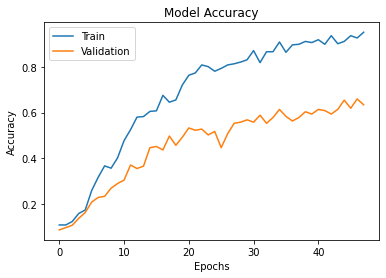

In [72]:
score = model.evaluate(validation_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [73]:
model.save('10loaitraicay.h5')

măng cụt


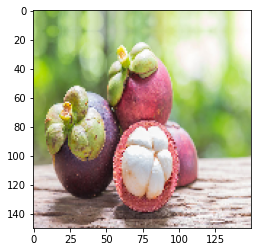

In [74]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/traicay/Test/mangcut/măng cụt/Image_1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='bưởi'
if round(result[0][1])==1:
  prediction='cam'
if round(result[0][2])==1:
  prediction='dâu'
if round(result[0][3])==1:
  prediction='dưa hấu'
if round(result[0][4])==1:
  prediction='lê'
if round(result[0][5])==1:
  prediction='mận'
if round(result[0][6])==1:
  prediction='măng cụt'
if round(result[0][7])==1:
  prediction='ổi'
if round(result[0][8])==1:
  prediction='thanh long'
if round(result[0][9])==1:
  prediction='xoài'
print(prediction)

xoài


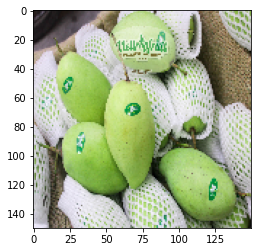

In [84]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/traicay/Test/xoai/xoài/Image_3.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='bưởi'
if round(result[0][1])==1:
  prediction='cam'
if round(result[0][2])==1:
  prediction='dâu'
if round(result[0][3])==1:
  prediction='dưa hấu'
if round(result[0][4])==1:
  prediction='lê'
if round(result[0][5])==1:
  prediction='mận'
if round(result[0][6])==1:
  prediction='măng cut'
if round(result[0][7])==1:
  prediction='ổi'
if round(result[0][8])==1:
  prediction='thanh long'
if round(result[0][9])==1:
  prediction='xoài'
print(prediction)

ổi


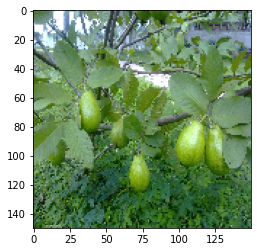

In [88]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/traicay/Test/oi/quả ổi/Image_2.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='bưởi'
if round(result[0][1])==1:
  prediction='cam'
if round(result[0][2])==1:
  prediction='dâu'
if round(result[0][3])==1:
  prediction='dưa hấu'
if round(result[0][4])==1:
  prediction='lê'
if round(result[0][5])==1:
  prediction='mận'
if round(result[0][6])==1:
  prediction='măng cut'
if round(result[0][7])==1:
  prediction='ổi'
if round(result[0][8])==1:
  prediction='thanh long'
if round(result[0][9])==1:
  prediction='xoài'
print(prediction)